# Estimating the position of a moving object with measurements using Kalman Filters

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tfilterpy import KalmanFilter

_______________________

Suppose we have a moving object with a constant velocity that is measured using a sensor with some measurement noise. We want to estimate the position of the object at each time step using a Kalman filter. 

Let's assume that the true position of the object is given by the following equation:

    $x_true(t) = 0.5 * a * t^{2} + v_{0} * t + x_{0} $

where a is the acceleration, v_{0} is the initial velocity, and x_{0} is the initial position.

We can simulate the measurements by adding some random noise to the true position:

    $x_meas(t) = x_true(t) + w(t)$

where w(t) is the measurement noise at time t.
________________________

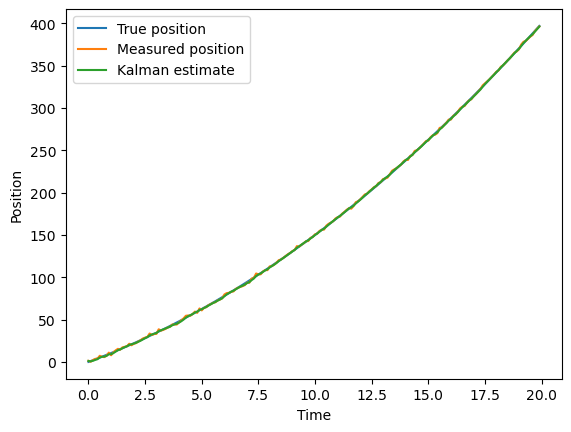

In [35]:
# Define the true state of the object
a = 1.0  # acceleration
v0 = 10.0  # initial velocity
x0 = 0.0  # initial position

# Define the time steps
t = np.arange(0, 20, 0.1)

# Simulate the true position of the object
x_true = 0.5 * a * t**2 + v0 * t + x0

# Simulate the measurement noise
w = np.random.normal(0, 1, len(t))

# Simulate the measured position of the object
x_meas = x_true + w

# Define the Kalman filter parameters
F = np.array([[1, 0.1],
              [0, 1]])
H = np.array([[1, 0]])
Q = np.eye(2) * 0.01
R = np.eye(1) * 0.1
x0 = np.array([0, 0])
P0 = np.eye(2) * 1

# Initialize the Kalman filter
kf = KalmanFilter(F, H, Q, R, x0, P0)

# Run the Kalman filter on the data
state_estimates = []
for z in x_meas:
    kf.predict()
    kf.update(np.array([z]))
    state_estimates.append(kf.x[0])

# Plot the results
plt.figure()
plt.plot(t, x_true, label='True position')
plt.plot(t, x_meas, label='Measured position')
plt.plot(t, state_estimates, label='Kalman estimate')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Position')
plt.show()